In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score, f1_score, balanced_accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.neighbors import KNeighborsClassifier

# Extracting features

In [2]:
vectorizer = TfidfVectorizer()

In [3]:
def convert_to_feature(raw_tokenize_data):
    raw_sentences = [' '.join(o) for o in raw_tokenize_data]
    return vectorizer.transform(raw_sentences)

In [4]:
def extracting_features(X):
    X = [str(i).split(" ") for i in X]
    
    raw_sentences = [' '.join(i) for i in X]
    vectorizer.fit(raw_sentences)
    X_features = convert_to_feature(X)
    return X_features

# features

In [5]:
df = pd.read_csv("CleanHam.csv")


In [6]:
XH = df.iloc[:,2] #EmailText column
YH = df.iloc[:,1]  #Label

In [7]:
df = pd.read_csv("CleanSpam.csv")


In [8]:
XS = df.iloc[:,2] #EmailText column
YS = df.iloc[:,1]  #Label

In [9]:
X = np.concatenate((XH,XS))

In [10]:
X[9]

'dont know make bay area eff having benifit party ast dna lounge san francisco tonight wil weaton wesley crussher star trek tng fight barney dinasour come youre doing sfnet email sponsored osdn tired old cell phone new free httpadr spamassassindevel mailing list adremail httpadr'

In [11]:
X.shape

(5076,)

In [12]:
X_features = extracting_features(X)

In [13]:
X_features.shape

(5076, 69446)

In [14]:
Y = np.concatenate((YH, YS))

In [15]:
Y.shape

(5076,)

# Splitting data to test and train data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_features, Y, random_state=0, train_size = .8)

# Training Models

In [17]:
X_train.shape

(4060, 69446)

# Gaussien model

In [18]:
gs = GaussianNB()

In [19]:
gs.fit(X_train.toarray(),y_train)

GaussianNB()

# Logistic Regression model

In [20]:
lr = LogisticRegression(random_state=0)


In [21]:
lr.fit(X_train.toarray(),y_train)

LogisticRegression(random_state=0)

# SVM rbf model

In [22]:
svm = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)

In [23]:
svm.fit(X_train.toarray(),y_train)


SVC(gamma=0.7)

# KNN

In [24]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train.toarray(),y_train)

KNeighborsClassifier(n_neighbors=3)

# **Error Analysis Function**

In [25]:
def mesures(model, X, Y):
  y_predict = model.predict(X)
  tn, fp, fn, tp = confusion_matrix(Y,y_predict).ravel()
  print("Precision: {:.2f}%".format(100 * precision_score(Y, y_predict)))
  print("Recall: {:.2f}%".format(100 * recall_score(Y, y_predict)))
  print("f1 score macro: {:.2f}%".format(100 * f1_score(Y, y_predict, average='macro')))
  print("f1 score micro: {:.2f}%".format(100 * f1_score(Y, y_predict, average='micro')))
  print("f1 score wieghted: {:.2f}%".format(100 * f1_score(Y, y_predict, average='weighted')))
  print("f1 score none: {:.2f}%".format(100 * f1_score(Y, y_predict)))
  print("balanced accuracy : {:.2f}%".format(100 * balanced_accuracy_score(Y, y_predict)))
  cnf_matrix = confusion_matrix(Y,y_predict)
  plt.figure()
  plot_confusion_matrix(cnf_matrix, classes=['Non Spam','Spam'], normalize=False,
                      title='Confusion matrix')


In [26]:
def show_confusion_matrix(model, X, Y):
  y_predict = model.predict(X)
  cnf_matrix = confusion_matrix(Y,y_predict)
  plt.figure()
  plot_confusion_matrix(cnf_matrix, classes=['Non Spam','Spam'], normalize=False,
                      title='Confusion matrix')


In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# **Model Mesures**

# Gaussian

**Training data**

In [28]:
#gs.score(X_train.toarray(),y_train)


In [29]:
#mesures(gs, X_train.toarray(),y_train)

In [30]:
#show_confusion_matrix(gs, X_train.toarray(),y_train)

**Testing Data**

In [31]:
gs.score(X_test.toarray(),y_test)

0.9232283464566929

Precision: 83.96%
Recall: 76.59%
f1 score macro: 87.67%
f1 score micro: 92.32%
f1 score wieghted: 92.19%
f1 score none: 80.10%
balanced accuracy : 86.44%
Confusion matrix, without normalization
[[781  30]
 [ 48 157]]


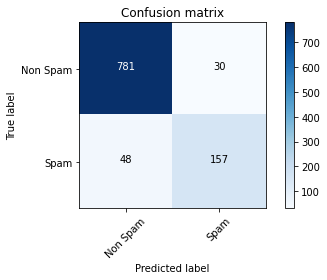

In [32]:
mesures(gs, X_test.toarray(),y_test)

# Logistic Regression

**Training data**

In [33]:
#lr.score(X_train.toarray(),y_train)


In [34]:
#mesures(lr, X_train.toarray(),y_train)

**Testing Data**

In [35]:
#lr.score(X_test.toarray(),y_test)

Precision: 97.67%
Recall: 81.95%
f1 score macro: 93.32%
f1 score micro: 95.96%
f1 score wieghted: 95.83%
f1 score none: 89.12%
balanced accuracy : 90.73%
Confusion matrix, without normalization
[[807   4]
 [ 37 168]]


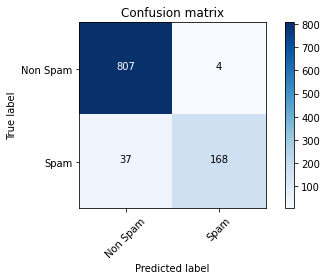

In [36]:
mesures(lr, X_test.toarray(),y_test)

# SVM

**Training data**

In [37]:
#svm.score(X_train.toarray(),y_train)


In [38]:
#mesures(svm, X_train.toarray(),y_train)

In [39]:
#show_confusion_matrix(svm, X_train.toarray(),y_train)

**Testing Data**

In [40]:
#svm.score(X_test.toarray(),y_test)

Precision: 97.89%
Recall: 90.73%
f1 score macro: 96.39%
f1 score micro: 97.74%
f1 score wieghted: 97.70%
f1 score none: 94.18%
balanced accuracy : 95.12%
Confusion matrix, without normalization
[[807   4]
 [ 19 186]]


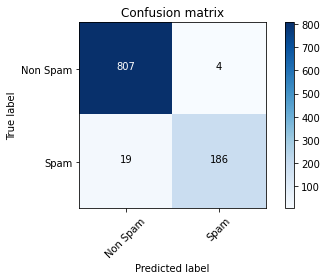

In [41]:
mesures(svm, X_test.toarray(),y_test)

# KNN

**Training data**

In [42]:
#neigh.score(X_train.toarray(),y_train)


In [43]:
#mesures(neigh, X_train.toarray(),y_train)

In [44]:
#show_confusion_matrix(neigh, X_train.toarray(),y_train)

**Testing Data**

In [45]:
#neigh.score(X_test.toarray(),y_test)

Precision: 86.61%
Recall: 94.63%
f1 score macro: 93.94%
f1 score micro: 95.96%
f1 score wieghted: 96.03%
f1 score none: 90.44%
balanced accuracy : 95.47%
Confusion matrix, without normalization
[[781  30]
 [ 11 194]]


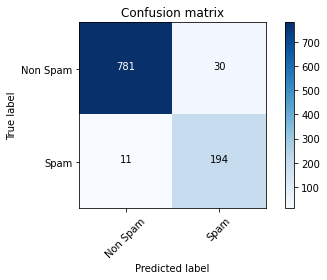

In [46]:
mesures(neigh, X_test.toarray(),y_test)